<a href="https://colab.research.google.com/github/thiagovicino/python_analise_dados/blob/main/An%C3%A1lise_dados_02_json_thiago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalhando com arquivos .json

## Importação do arquivo json e normalização

In [88]:
import numpy as np
import pandas as pd

In [89]:
import os
import json
from google.colab import drive
drive.mount("/content/drive/")
lista = os.listdir("/content/drive/MyDrive/Colab Notebooks/") 
lista

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


['Análise_dados_02_json-thiago.ipynb',
 'METADADOS_FINAL.json',
 'Hemeroteca_PEB.ipynb',
 'hemeroteca-peb_analise_dados-Thiago.ipynb',
 'Análise_dados_02_csv-thiago.ipynb']

In [90]:
arq_json = "METADADOS_FINAL.json"
with open (f'/content/drive/MyDrive/Colab Notebooks/{arq_json}') as arq:
  j_dataset = json.load(arq)
dataset = pd.DataFrame(j_dataset)
dataset

,_default
1,"{'tema': '03-brasil-argentina', 'data': '26/11..."
10,"{'tema': '03-brasil-argentina', 'data': '17/12..."
100,"{'tema': '08-brasil-europa', 'data': '00/00/00..."
1000,"{'tema': '03-brasil-argentina', 'data': '11/01..."
10000,"{'tema': '12-brasil-politica_exterior', 'data'..."
...,...
9995,"{'tema': '12-brasil-politica_exterior', 'data'..."
9996,"{'tema': '12-brasil-politica_exterior', 'data'..."
9997,"{'tema': '12-brasil-politica_exterior', 'data'..."
9998,"{'tema': '12-brasil-politica_exterior', 'data'..."


In [91]:
dataset = pd.read_json(f'/content/drive/MyDrive/Colab Notebooks/{arq_json}')
dataset

,_default
1,"{'tema': '03-brasil-argentina', 'data': '26/11..."
10,"{'tema': '03-brasil-argentina', 'data': '17/12..."
100,"{'tema': '08-brasil-europa', 'data': '00/00/00..."
1000,"{'tema': '03-brasil-argentina', 'data': '11/01..."
10000,"{'tema': '12-brasil-politica_exterior', 'data'..."
...,...
9995,"{'tema': '12-brasil-politica_exterior', 'data'..."
9996,"{'tema': '12-brasil-politica_exterior', 'data'..."
9997,"{'tema': '12-brasil-politica_exterior', 'data'..."
9998,"{'tema': '12-brasil-politica_exterior', 'data'..."


In [92]:
dataset = pd.read_json(f'/content/drive/MyDrive/Colab Notebooks/{arq_json}', orient="columns")
dataset = pd.json_normalize(dataset["_default"])
dataset

,tema,data,jornal,jornal_sigla,titulo_noticia,nome_arquivo_tif,nome_arquivo_pdf,quant_pags,verifica_ocr,paragrafos,autoria,dir_bd,dir_arquivo,codigo_bd,dir_pdf
0,03-brasil-argentina,26/11/2004,Jornal da ciência,SBPC,Reunião de Buenos Aires: Ciências da saúde,[2004-11-26-SBPC-Reuniao_de_Buenos_Aires:_cien...,2004-11-26-SBPC-Reuniao_de_Buenos_Aires:_cienc...,1,true,NA,NA,/media/hdvm08/bd/002/997/001/json,/media/hdvm08/bd/002/997/001/tif/03-brasil-arg...,/002/997/001,/media/hdvm08/bd/002/997/001/pdf/03-brasil-arg...
1,03-brasil-argentina,17/12/2009,Gazeta Mercantil,GZM,Agrale investirá uS$ 10 milhões na argentina,[2009-12-17-GZM-Agrale_investira_uS$_10_milhoe...,2009-12-17-GZM-Agrale_investira_uS$_10_milhoes...,1,true,NA,NA,/media/hdvm08/bd/002/997/001/json,/media/hdvm08/bd/002/997/001/tif/03-brasil-arg...,/002/997/001,/media/hdvm08/bd/002/997/001/pdf/03-brasil-arg...
2,08-brasil-europa,00/00/0000,O Estado de S. Paulo,ESP,UE prepara estímulos para o etanol e Brasil po...,[0000-00-00-ESP-UE_prepara_estimulos_para_o_et...,0000-00-00-ESP-UE_prepara_estimulos_para_o_eta...,1,true,NA,NA,/media/hdvm08/bd/002/997/001/json,/media/hdvm08/bd/002/997/001/tif/08-brasil-eur...,/002/997/001,/media/hdvm08/bd/002/997/001/pdf/08-brasil-europa
3,03-brasil-argentina,11/01/2002,Gazeta Mercantil,GZM,Sistema financeiro ja esta falido,[2002-01-11-GZM-Sistema_financeiro_ja_esta_fal...,2002-01-11-GZM-Sistema_financeiro_ja_esta_fali...,1,true,NA,NA,/media/hdvm08/bd/002/997/001/json,/media/hdvm08/bd/002/997/001/tif/03-brasil-arg...,/002/997/001,/media/hdvm08/bd/002/997/001/pdf/03-brasil-arg...
4,12-brasil-politica_exterior,30/03/2000,Gazeta Mercantil,GZM,Apoio a Embraer de novo sob pressao,[2000-03-30-GZM-Apoio_a_Embraer_de_novo_sob_pr...,2000-03-30-GZM-Apoio_a_Embraer_de_novo_sob_pre...,1,true,NA,NA,/media/hdvm08/bd/002/997/001/json,/media/hdvm08/bd/002/997/001/tif/12-brasil-pol...,/002/997/001,/media/hdvm08/bd/002/997/001/pdf/12-brasil-pol...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28993,12-brasil-politica_exterior,23/03/2000,O Estado de S. Paulo,ESP,OMC suspende negociacoes sobre agricultura,[2000-03-23-ESP-OMC_suspende_negociacoes_sobre...,2000-03-23-ESP-OMC_suspende_negociacoes_sobre_...,1,true,NA,NA,/media/hdvm08/bd/002/997/001/json,/media/hdvm08/bd/002/997/001/tif/12-brasil-pol...,/002/997/001,/media/hdvm08/bd/002/997/001/pdf/12-brasil-pol...
28994,12-brasil-politica_exterior,24/03/2000,Gazeta Mercantil,GZM,UE insiste em multifuncionalidade na agricultu,[2000-03-24-GZM-UE_insiste_em_multifuncionalid...,2000-03-24-GZM-UE_insiste_em_multifuncionalida...,2,true,NA,NA,/media/hdvm08/bd/002/997/001/json,/media/hdvm08/bd/002/997/001/tif/12-brasil-pol...,/002/997/001,/media/hdvm08/bd/002/997/001/pdf/12-brasil-pol...
28995,12-brasil-politica_exterior,27/03/2000,Gazeta Mercantil,GZM,Tavares distribuira farpas contra os paises ma,[2000-03-27-GZM-Tavares_distribuira_farpas_con...,2000-03-27-GZM-Tavares_distribuira_farpas_cont...,1,true,NA,NA,/media/hdvm08/bd/002/997/001/json,/media/hdvm08/bd/002/997/001/tif/12-brasil-pol...,/002/997/001,/media/hdvm08/bd/002/997/001/pdf/12-brasil-pol...
28996,12-brasil-politica_exterior,28/03/2000,O Estado de S. Paulo,ESP,FMI deve promover estabilidade e crescimento,[2000-03-28-ESP-FMI_deve_promover_estabilidade...,2000-03-28-ESP-FMI_deve_promover_estabilidade_...,3,true,NA,NA,/media/hdvm08/bd/002/997/001/json,/media/hdvm08/bd/002/997/001/tif/12-brasil-pol...,/002/997/001,/media/hdvm08/bd/002/997/001/pdf/12-brasil-pol...


## Visualização dos dados

In [93]:
# vetorizando os gráficos
%config InlineBackend.figure_formats = ['svg']

In [94]:
# Notícias por tema
noticias_por_tema = dataset["tema"].value_counts().sort_index()
noticias_por_tema

01-brasil-africa                              325
02-brasil-america_latina                     8977
03-brasil-argentina                          2042
04-brasil-asia                                811
05-brasil-dialogo_subnacional                 116
06-brasil-economia_internacional             1687
07-brasil-eua                                1940
08-brasil-europa                             2296
09-brasil-informatica_e_direitos_autorais     868
10-brasil-meio_ambiente                      1851
11-brasil-oriente_medio                       479
12-brasil-politica_exterior                  7606
Name: tema, dtype: int64

<AxesSubplot:>

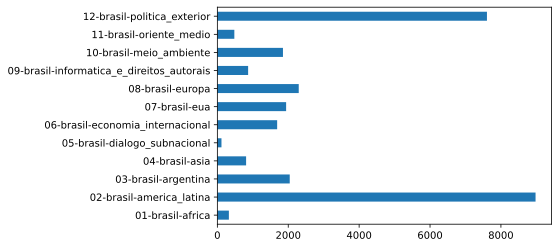

In [95]:
# Gráfico de barra de notícias por tema
frequencia_noticias = noticias_por_tema.plot(kind="barh")
frequencia_noticias

In [135]:
# Criando o índice "ano"
ano = dataset["data"].apply(lambda x: x[-4:]) # apply para fazer um slicing da string
type(ano)
# Notícias por ano
noticias_por_ano = ano.value_counts().sort_index()
noticias_por_ano

0000     185
1934       1
1976       1
1977       2
1979       4
1980       3
1981       6
1982      26
1983      36
1984     242
1985     237
1986     461
1987     230
1988      98
1989      92
1990      98
1991     370
1992     449
1993     723
1994     681
1995    1033
1996    1568
1997    1428
1998    1473
1999    1010
2000    1324
2001    1682
2002    2467
2003    2377
2004    2178
2005    1910
2006    1766
2007    1328
2008    1273
2009    1008
2010    1212
2011       3
2012       2
2013       1
2018       1
2033       1
6/95       1
ado)       7
Name: data, dtype: int64

<AxesSubplot:>

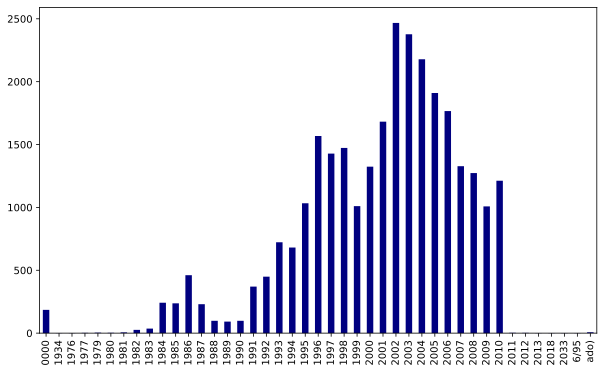

In [136]:
# Gráfico de barra notícias por ano
frequencia_noticias = noticias_por_ano.plot(kind="bar", figsize=(10, 6), color="navy")
frequencia_noticias

### Encontrando a Series com erro na data e fazendo o replace

In [156]:
# Series com erros de digitação
indice_erro_digitacao = dataset.loc[ano == "1934"]
indice_erro_digitacao

,tema,data,jornal,jornal_sigla,titulo_noticia,nome_arquivo_tif,nome_arquivo_pdf,quant_pags,verifica_ocr,paragrafos,autoria,dir_bd,dir_arquivo,codigo_bd,dir_pdf
24641,12-brasil-politica_exterior,13/09/1934,Folha de S. Paulo,FSP,O depoimento sigiloso prestado aos deputados,[1934-09-13-FSP-O_depoimento_sigiloso_prestado...,1934-09-13-FSP-O_depoimento_sigiloso_prestado_...,1,true,NA,NA,/media/hdvm08/bd/002/997/001/json,/media/hdvm08/bd/002/997/001/tif/12-brasil-pol...,/002/997/001,/media/hdvm08/bd/002/997/001/pdf/12-brasil-pol...


In [157]:
indice_erro_digitacao = dataset.loc[ano == "2033"]
indice_erro_digitacao

,tema,data,jornal,jornal_sigla,titulo_noticia,nome_arquivo_tif,nome_arquivo_pdf,quant_pags,verifica_ocr,paragrafos,autoria,dir_bd,dir_arquivo,codigo_bd,dir_pdf
7284,07-brasil-eua,01/11/2033,O Estado de S. Paulo,ESP,Comércio pode perder com novas leis americanas,[2033-11-01-ESP-Comercio_pode_perder_com_novas...,2033-11-01-ESP-Comercio_pode_perder_com_novas_...,1,true,NA,NA,/media/hdvm08/bd/002/997/001/json,/media/hdvm08/bd/002/997/001/tif/07-brasil-eua/,/002/997/001,/media/hdvm08/bd/002/997/001/pdf/07-brasil-eua


In [158]:
indice_erro_digitacao = dataset.loc[ano == "6/95"]
indice_erro_digitacao

,tema,data,jornal,jornal_sigla,titulo_noticia,nome_arquivo_tif,nome_arquivo_pdf,quant_pags,verifica_ocr,paragrafos,autoria,dir_bd,dir_arquivo,codigo_bd,dir_pdf
28510,02-brasil-america_latina,12/06/95,Gazeta Mercantil,GZM,Mercosul tem criticos no governo,[95-06-12-GZM-Mercosul_tem_criticos_no_governo...,95-06-12-GZM-Mercosul_tem_criticos_no_governo-...,1,true,NA,NA,/media/hdvm08/bd/002/997/001/json,/media/hdvm08/bd/002/997/001/tif/02-brasil-ame...,/002/997/001,/media/hdvm08/bd/002/997/001/pdf/02-brasil-ame...


In [159]:
indice_erro_digitacao = dataset.loc[ano == "2013"]
indice_erro_digitacao

,tema,data,jornal,jornal_sigla,titulo_noticia,nome_arquivo_tif,nome_arquivo_pdf,quant_pags,verifica_ocr,paragrafos,autoria,dir_bd,dir_arquivo,codigo_bd,dir_pdf
7283,07-brasil-eua,04/12/2013,O Estado de S. Paulo,ESP,Eua estudam formas de manter proteção ao aço,[2013-12-04-ESP-Eua_estudam_formas_de_manter_p...,2013-12-04-ESP-Eua_estudam_formas_de_manter_pr...,1,true,NA,NA,/media/hdvm08/bd/002/997/001/json,/media/hdvm08/bd/002/997/001/tif/07-brasil-eua/,/002/997/001,/media/hdvm08/bd/002/997/001/pdf/07-brasil-eua


In [160]:
indice_erro_digitacao = dataset.loc[ano == "2012"]
indice_erro_digitacao

,tema,data,jornal,jornal_sigla,titulo_noticia,nome_arquivo_tif,nome_arquivo_pdf,quant_pags,verifica_ocr,paragrafos,autoria,dir_bd,dir_arquivo,codigo_bd,dir_pdf
7281,07-brasil-eua,18/07/2012,O Estado de S. Paulo,ESP,"Meta será produção, diz dirceu nos eua","[2012-07-18-ESP-Meta_sera_producao,_diz_dirceu...","2012-07-18-ESP-Meta_sera_producao,_diz_dirceu_...",1,true,NA,NA,/media/hdvm08/bd/002/997/001/json,/media/hdvm08/bd/002/997/001/tif/07-brasil-eua/,/002/997/001,/media/hdvm08/bd/002/997/001/pdf/07-brasil-eua
7282,07-brasil-eua,17/12/2012,Gazeta Mercantil,GZM,Alcântara é ''inaceitável'',[2012-12-17-GZM-Alcantara_e_''inaceitavel''-p0...,2012-12-17-GZM-Alcantara_e_''inaceitavel''-p01...,1,true,NA,NA,/media/hdvm08/bd/002/997/001/json,/media/hdvm08/bd/002/997/001/tif/07-brasil-eua/,/002/997/001,/media/hdvm08/bd/002/997/001/pdf/07-brasil-eua


In [161]:
indice_erro_digitacao = dataset.loc[ano == "2011"]
indice_erro_digitacao

,tema,data,jornal,jornal_sigla,titulo_noticia,nome_arquivo_tif,nome_arquivo_pdf,quant_pags,verifica_ocr,paragrafos,autoria,dir_bd,dir_arquivo,codigo_bd,dir_pdf
3754,12-brasil-politica_exterior,09/10/2011,O Estado de S. Paulo,ESP,Respaldo americano não é desfeita ao brasil,[2011-10-09-ESP-Respaldo_americano_nao_e_desfe...,2011-10-09-ESP-Respaldo_americano_nao_e_desfei...,1,true,NA,NA,/media/hdvm08/bd/002/997/001/json,/media/hdvm08/bd/002/997/001/tif/12-brasil-pol...,/002/997/001,/media/hdvm08/bd/002/997/001/pdf/12-brasil-pol...
23852,08-brasil-europa,01/01/2011,O Estado de S. Paulo,ESP,Italiano diz que decisão é 'contra sentido de ...,[2011-01-01-ESP-Italiano_diz_que_decisao_e_'co...,2011-01-01-ESP-Italiano_diz_que_decisao_e_'con...,1,true,NA,NA,/media/hdvm08/bd/002/997/001/json,/media/hdvm08/bd/002/997/001/tif/08-brasil-eur...,/002/997/001,/media/hdvm08/bd/002/997/001/pdf/08-brasil-europa
23853,08-brasil-europa,01/01/2011,O Estado de S. Paulo,ESP,Lula mantém Battisti no País e deixa para DIlm...,[2011-01-01-ESP-Lula_mantem_Battisti_no_Pais_e...,2011-01-01-ESP-Lula_mantem_Battisti_no_Pais_e_...,1,true,NA,NA,/media/hdvm08/bd/002/997/001/json,/media/hdvm08/bd/002/997/001/tif/08-brasil-eur...,/002/997/001,/media/hdvm08/bd/002/997/001/pdf/08-brasil-europa


In [145]:
# Series com expressão "(verificado)" na data
indice_expressao_verificado = dataset.loc[ano == "ado)"]
print(f'Quantidade de entradas com expressão "(verificado)" nas datas: {indice_expressao_verificado.shape[0]}')
indice_expressao_verificado

Quantidade de entradas com o erro "verificado": 7


,tema,data,jornal,jornal_sigla,titulo_noticia,nome_arquivo_tif,nome_arquivo_pdf,quant_pags,verifica_ocr,paragrafos,autoria,dir_bd,dir_arquivo,codigo_bd,dir_pdf
24522,09-brasil-informatica_e_direitos_autorais,1986 (verificado),NA,NA,Brasil terá este ano uma lei antidumping,[verificado)-6 -19-NA-Brasil_tera_este_ano_uma...,verificado)-6 -19-NA-Brasil_tera_este_ano_uma_...,1,true,NA,NA,/media/hdvm08/bd/002/997/001/json,/media/hdvm08/bd/002/997/001/tif/09-brasil-inf...,/002/997/001,/media/hdvm08/bd/002/997/001/pdf/09-brasil-inf...
24533,09-brasil-informatica_e_direitos_autorais,1984 (verificado),NA,NA,Um perigo para o Brasil,[verificado)-4 -19-NA-Um_perigo_para_o_Brasil-...,verificado)-4 -19-NA-Um_perigo_para_o_Brasil-p...,1,true,NA,NA,/media/hdvm08/bd/002/997/001/json,/media/hdvm08/bd/002/997/001/tif/09-brasil-inf...,/002/997/001,/media/hdvm08/bd/002/997/001/pdf/09-brasil-inf...
24544,09-brasil-informatica_e_direitos_autorais,1986 (verificado),NA,NA,Staub protesta contra redução das reunioes,[verificado)-6 -19-NA-Staub_protesta_contra_re...,verificado)-6 -19-NA-Staub_protesta_contra_red...,1,true,NA,NA,/media/hdvm08/bd/002/997/001/json,/media/hdvm08/bd/002/997/001/tif/09-brasil-inf...,/002/997/001,/media/hdvm08/bd/002/997/001/pdf/09-brasil-inf...
24557,09-brasil-informatica_e_direitos_autorais,1986 (verificado),NA,NA,Fiesp teme prejuizos e sugere analise objetiva,[verificado)-6 -19-NA-Fiesp_teme_prejuizos_e_s...,verificado)-6 -19-NA-Fiesp_teme_prejuizos_e_su...,1,true,NA,NA,/media/hdvm08/bd/002/997/001/json,/media/hdvm08/bd/002/997/001/tif/09-brasil-inf...,/002/997/001,/media/hdvm08/bd/002/997/001/pdf/09-brasil-inf...
24568,09-brasil-informatica_e_direitos_autorais,1985 (verificado),NA,NA,"Uma politica de informatica independente, pede...",[verificado)-5 -19-NA-Uma_politica_de_informat...,verificado)-5 -19-NA-Uma_politica_de_informati...,1,true,NA,NA,/media/hdvm08/bd/002/997/001/json,/media/hdvm08/bd/002/997/001/tif/09-brasil-inf...,/002/997/001,/media/hdvm08/bd/002/997/001/pdf/09-brasil-inf...
24579,09-brasil-informatica_e_direitos_autorais,1986 (verificado),NA,NA,Contencioso é examinado no rio,[verificado)-6 -19-NA-Contencioso_e_examinado_...,verificado)-6 -19-NA-Contencioso_e_examinado_n...,1,true,NA,NA,/media/hdvm08/bd/002/997/001/json,/media/hdvm08/bd/002/997/001/tif/09-brasil-inf...,/002/997/001,/media/hdvm08/bd/002/997/001/pdf/09-brasil-inf...
24590,09-brasil-informatica_e_direitos_autorais,1984 (verificado),NA,NA,A ameaça de um governo paralelo,[verificado)-4 -19-NA-A_ameaca_de_um_governo_p...,verificado)-4 -19-NA-A_ameaca_de_um_governo_pa...,1,true,NA,NA,/media/hdvm08/bd/002/997/001/json,/media/hdvm08/bd/002/997/001/tif/09-brasil-inf...,/002/997/001,/media/hdvm08/bd/002/997/001/pdf/09-brasil-inf...


In [ ]:
# Notícias por jornal (sigla) 


In [ ]:
#Notícias por jornal (sigla) no ano de 2000


In [ ]:
# Notícias com "Brasil" no título


In [ ]:
# Notícias com "OMC" no título


### Ajustando índices do eixo x com o matplot

* [Vídeo: como configurar o eixo x](https://www.youtube.com/watch?v=3c206LU87Tc)

In [ ]:
# Lista de índices/legendas (labels)
lista_temas = noticias_por_tema.index.tolist()
lista_temas

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from textwrap import wrap #wrap deixa os textos (x) com o mesmo nº de caracteres por linha

In [ ]:
legenda = ['/n'.join(wrap(x, 9)) for x in lista_temas] # compreensão de lista
legenda

In [ ]:
frequencia_noticias = noticias_por_tema.plot(kind="bar")
plt.xticks(range(len(lista_temas)), legenda, rotation=0) 
plt.show